# Analisi Dati COVID-19 in Italia

Questo notebook analizza i dati aggiornati dalla Protezione Civile sul numero di contagi di <b>Covid-19</b> sulla suddivisione in province, in Italia.<br>
È possibile:
* Visualizzare i dati cumulativi giornalieri sul totale dei contagi in Italia
* Visualizzare i dati cumulativi giornalieri sul totale dei contagi in una specifica Provincia
* In aggiornamento...

### Import delle librerie, impostazioni

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request, json 
from io import StringIO
import matplotlib.dates as mdates

%matplotlib inline
plt.rcParams["figure.figsize"] = [20, 7]

pd.set_option('display.max_columns', None) # show all columns
#pd.set_option('display.max_rows', None) # show all rows

### Lettura dai raw della Protezione Civile del file .csv, prima ispezione

In [2]:
with urllib.request.urlopen("https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-province/dpc-covid19-ita-province.csv") as url:
    res = url.read().decode()

ts = StringIO(res)
df = pd.read_csv(ts)

odf = df # keep a copy
df.head()

,data,stato,codice_regione,denominazione_regione,codice_provincia,denominazione_provincia,sigla_provincia,lat,long,totale_casi
0,2020-02-24 18:00:00,ITA,13,Abruzzo,69,Chieti,CH,42.351032,14.167546,0
1,2020-02-24 18:00:00,ITA,13,Abruzzo,66,L'Aquila,AQ,42.351222,13.398438,0
2,2020-02-24 18:00:00,ITA,13,Abruzzo,68,Pescara,PE,42.464584,14.213648,0
3,2020-02-24 18:00:00,ITA,13,Abruzzo,67,Teramo,TE,42.658918,13.704400,0
4,2020-02-24 18:00:00,ITA,13,Abruzzo,979,In fase di definizione/aggiornamento,NaN,0.000000,0.000000,0


### Drop colonne inutilizzate

In [3]:
df = odf.drop(['stato', 'codice_regione', 'codice_provincia', 'denominazione_provincia', 'lat', 'long'], axis=1)

### Trasformazione della colonna 'data' (string -> datetime)

In [4]:
df['data'] = pd.to_datetime(df.data)
df = df.sort_values('data')

### Funzione di Plot

In [5]:
def plotCum(X, Y, legend):
    fig, ax = plt.subplots()
    ax.plot(Y, X)
    ax.set_xticks(Y)
    plt.xticks(rotation=60)  

    plt.legend(legend)
    plt.grid()
    plt.show()

### Plot della provincia

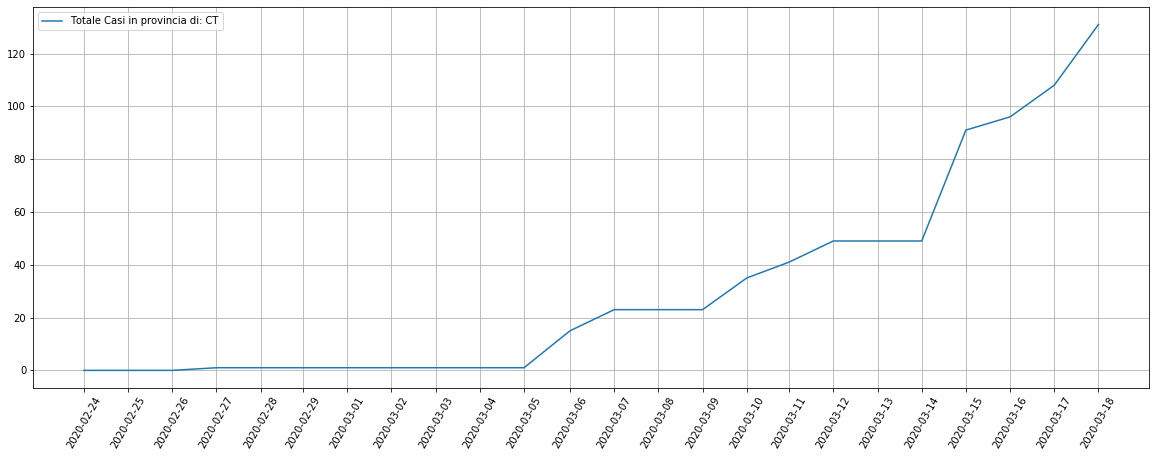

In [6]:
my_provincia = 'CT'

df_mp = df[df['sigla_provincia']==my_provincia] # data frame my-provincia

legend = ['Totale Casi in provincia di: ' + my_provincia]
X = df_mp['totale_casi']
Y = df_mp['data']

plotCum(X, Y, legend)

### Plot Nazionale

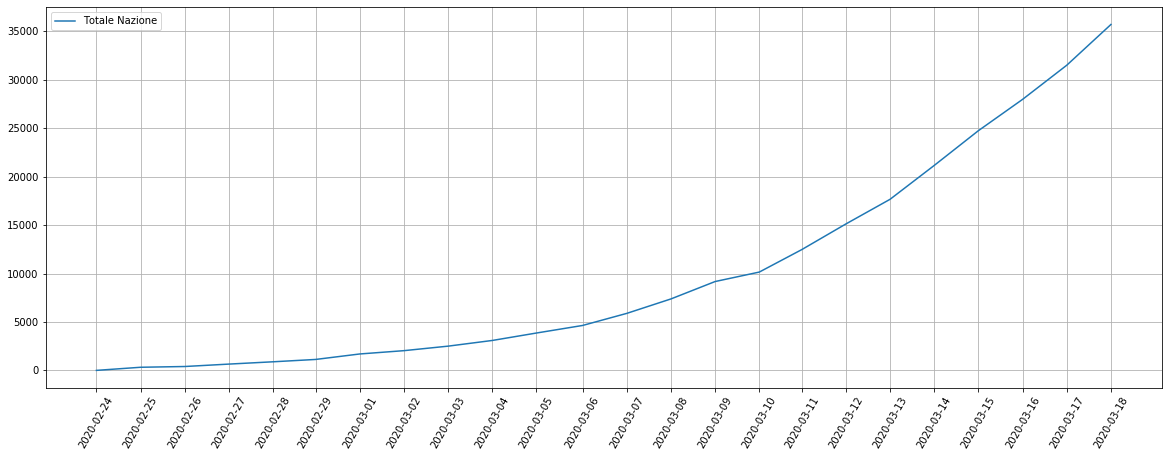

In [7]:
df_n = df.groupby(['data']) # data frame nazione

legend = ['Totale Nazione']
X = df_n['totale_casi'].sum() # sum all province
Y = df['data'].unique()

plotCum(X, Y, legend)